In [1]:
import pandas as pd
import numpy as np

# Preprocessing of Historical GME prices:

In [2]:
df = pd.read_csv('/home/thomas/Desktop/springboard/Capstone_two/capstone-two/data/01_raw/HistoricalData_1639082316419.csv', index_col=0)

In [3]:
df.reset_index(inplace=True)

In [4]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/08/2021,$173.65,2611195,$176.6,$180.2499,$171.96
1,12/07/2021,$177.81,1972395,$175.18,$181.98,$170.51
2,12/06/2021,$167.12,2228636,$166,$173.34,$163.2
3,12/03/2021,$172.39,4096688,$181,$183.93,$159.0501
4,12/02/2021,$181.56,2087100,$185,$187.43,$173.07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


    The first look at our data set shows that the only column that immediately looks okay is volume. Will need to do some work on Date, Open, High, Low, and Close/Last. Some simple str operations and type changes should fix that.

In [6]:
df.Date = pd.to_datetime(df.Date)

strip_cols = ['Close/Last', 'Open','High','Low']
for item in strip_cols:
    df[item] = df[item].str.replace('\$', '', regex=True)
    df[item] = df[item].astype('float')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
 2   Volume      2516 non-null   int64         
 3   Open        2516 non-null   float64       
 4   High        2516 non-null   float64       
 5   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [7]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-12-08,173.65,2611195,176.60,180.2499,171.9600
1,2021-12-07,177.81,1972395,175.18,181.9800,170.5100
2,2021-12-06,167.12,2228636,166.00,173.3400,163.2000
3,2021-12-03,172.39,4096688,181.00,183.9300,159.0501
4,2021-12-02,181.56,2087100,185.00,187.4300,173.0700


In [8]:
df = df[(df.Date >= '2016-01-01') & (df.Date < '2021-02-02')].copy()

In [9]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
216,2021-02-01,225.00,37382150,316.56,322.00,212.00
217,2021-01-29,325.00,50566060,379.71,413.98,250.00
218,2021-01-28,193.60,58815810,265.00,483.00,112.25
219,2021-01-27,347.51,93396670,354.83,380.00,249.00
220,2021-01-26,147.98,178588000,88.56,150.00,80.20


In [10]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,1279.000000,1.279000e+03,1279.000000,1279.000000,1279.000000
mean,16.911251,5.306369e+06,17.030579,17.706680,16.305845
std,17.683281,1.192971e+07,19.917328,24.070008,14.189341
min,2.800000,9.728540e+05,2.850000,2.940000,2.570000
25%,7.520000,2.150640e+06,7.385000,7.680000,7.070000
50%,15.310000,3.029873e+06,15.300000,15.600000,14.990000
75%,23.475000,4.577030e+06,23.460000,23.700000,23.070000
max,347.510000,1.971579e+08,379.710000,483.000000,250.000000


In [11]:
df.isna().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [12]:
import matplotlib.pyplot as plt

## Graphing Series:

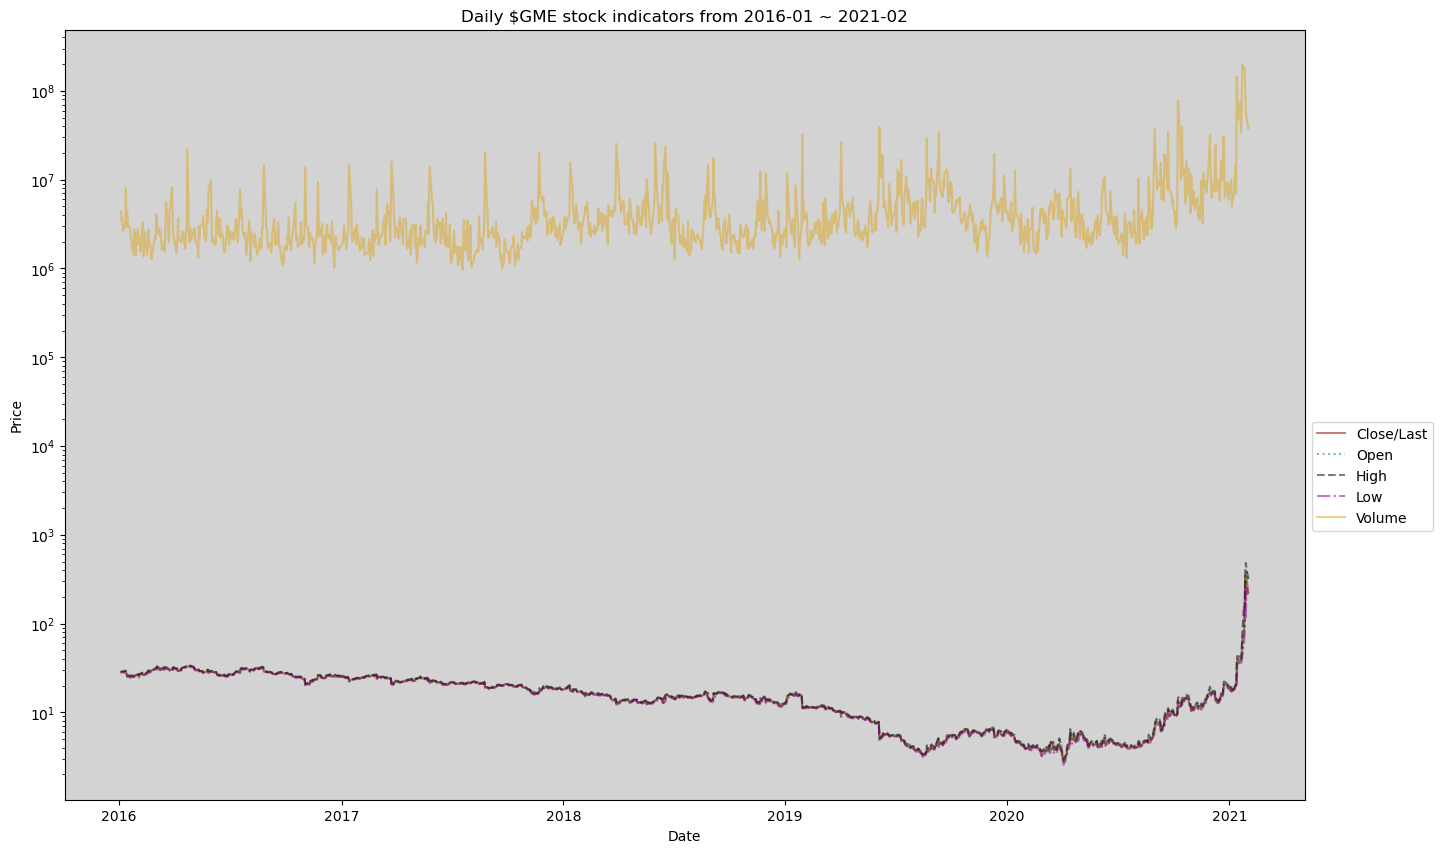

In [13]:
colors = ['darkred','green','black','purple']
styles = ['solid', 'dotted','dashed','dashdot']

_, ax = plt.subplots(1,1,figsize =(16,10))
ax.set_facecolor('lightgray')

for item, clr, stl in zip(strip_cols, colors, styles):
    ax.plot(df.Date, df[item], marker='', color=clr, linestyle=stl, label=item, alpha=0.5)

ax.plot(df.Date, df.Volume, marker='', linestyle = '-', color='goldenrod',label='Volume', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_yscale('log')
ax.set_title('Daily $GME stock indicators from 2016-01 ~ 2021-02')
plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
plt.show()
    
    

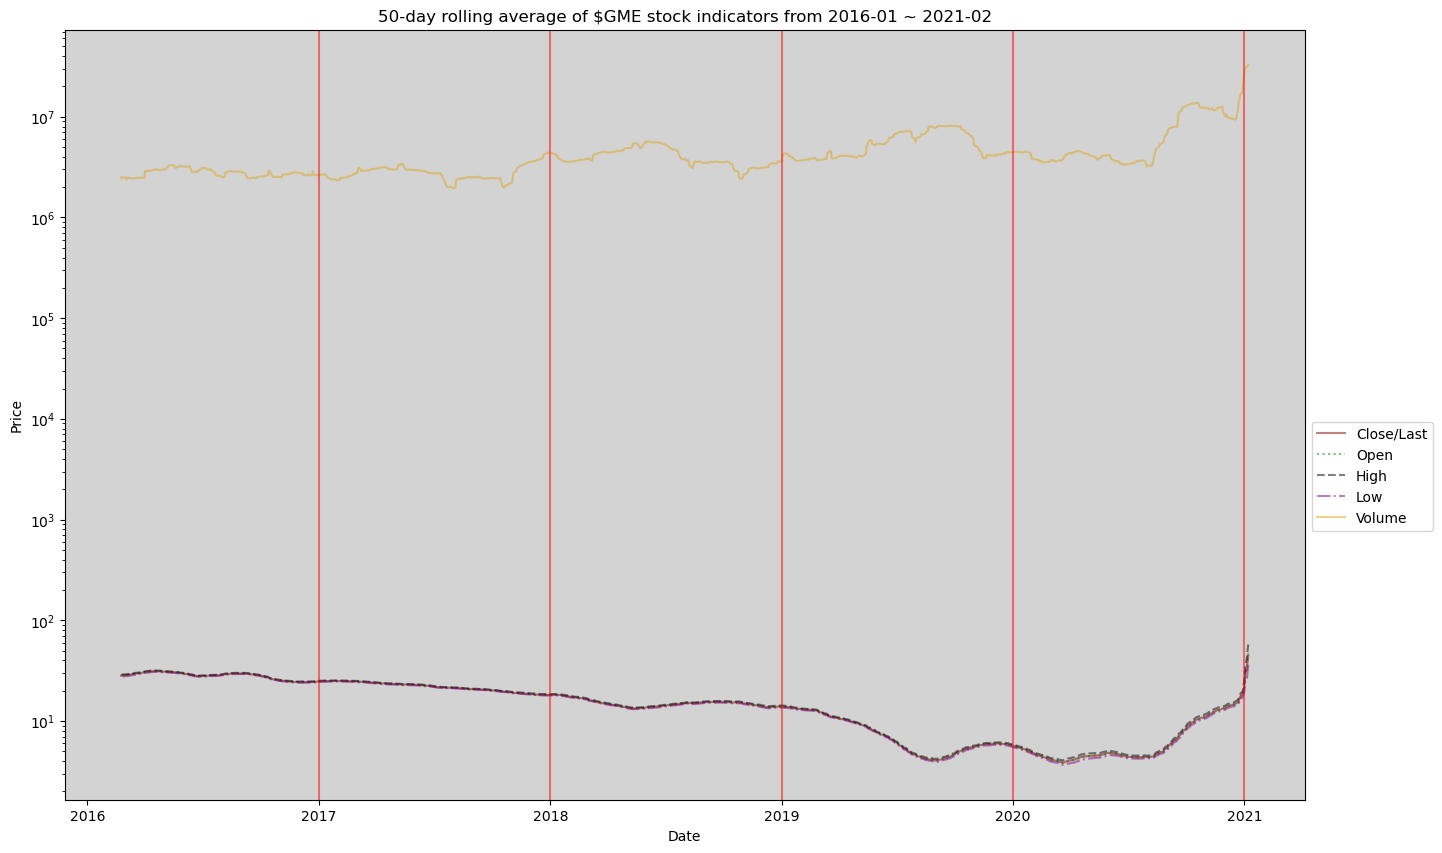

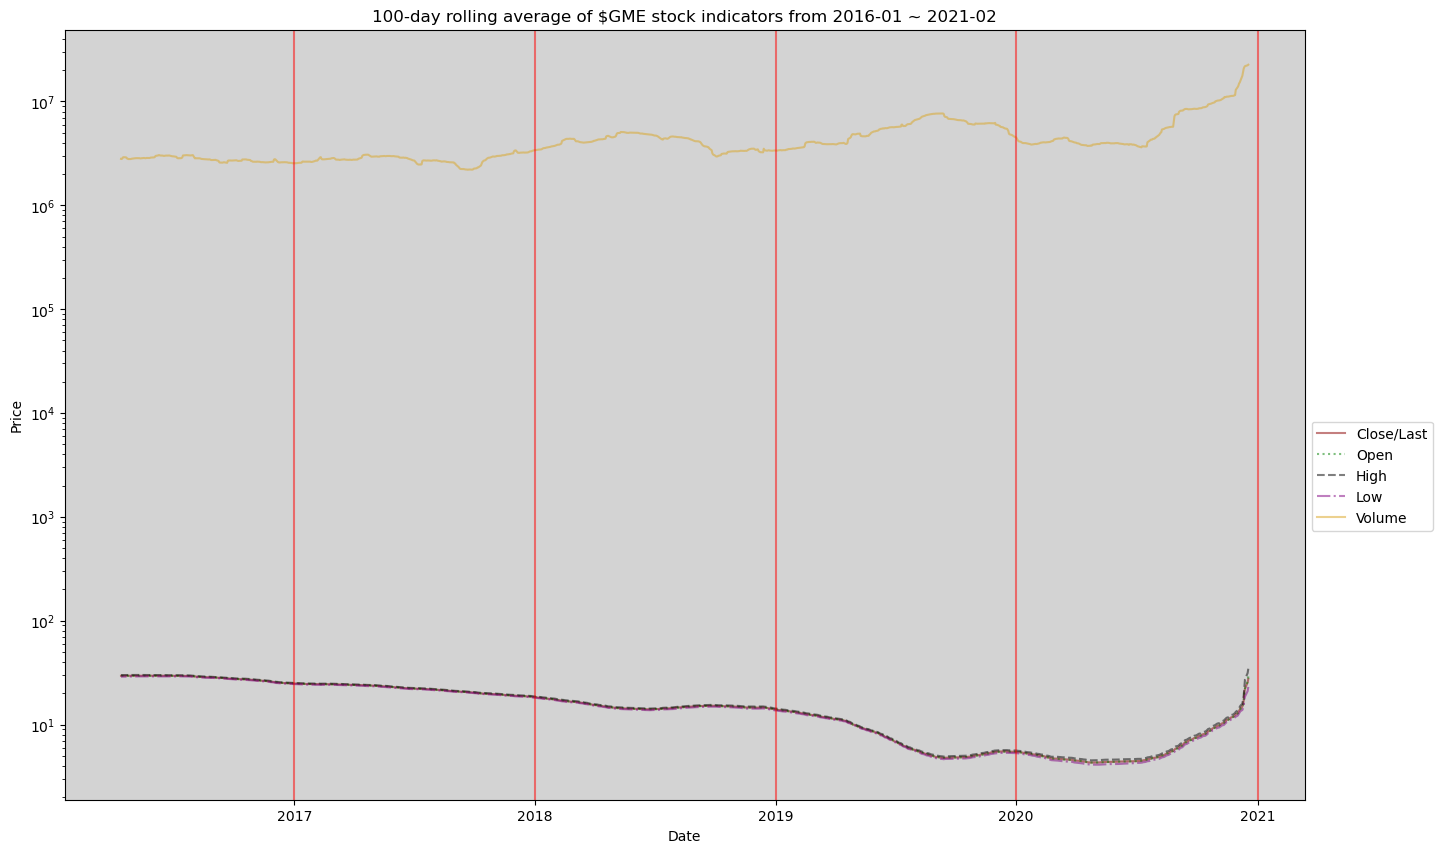

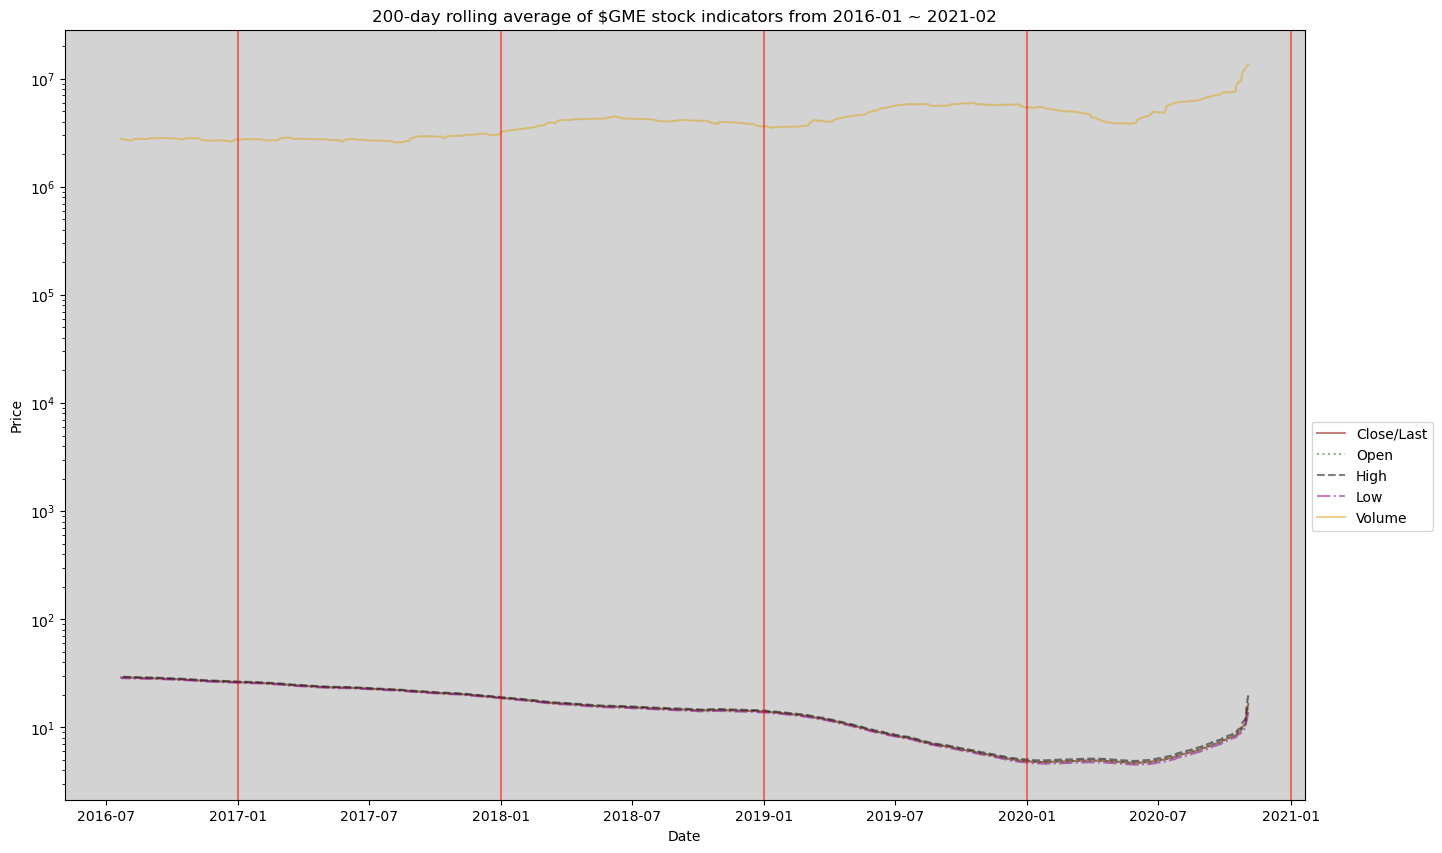

In [14]:
windows = [50, 100, 200]
for window in windows:
    
    _, ax = plt.subplots(1,1,figsize =(16,10))
    ax.set_facecolor('lightgray')

    for item, clr, stl in zip(strip_cols, colors, styles):
        data = df.set_index('Date')[item].rolling(window).mean().shift(window,freq='D')
        ax.plot(data.index, data.values, marker='', color=clr, linestyle=stl, label=item, alpha=0.5)
    data2 = df.set_index('Date')['Volume'].rolling(window).mean().shift(window, freq='D')
    ax.plot(data2.index, data2.values, marker='', color='goldenrod', linestyle='-', label='Volume', alpha=0.5)
    
    for vline in ['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01']:
        ax.axvline(pd.Timestamp(vline), color='red', alpha=0.5)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_yscale('log')
    ax.set_title(f'{window}-day rolling average of $GME stock indicators from 2016-01 ~ 2021-02')
    plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
    plt.show()

Just doing a visual inspection on the data above, it seems like there is a 6-10 month delay after a decrease in trading volume leading to a sustained decrease in price. While it seems like there is a much faster and short lived response to increases in trading volume leading to an increase in price. This holds up until the period around the end of 2020 and the beginning of 2021 where there appears to be a direct influence between volume and price.

In [15]:
import seaborn as sns

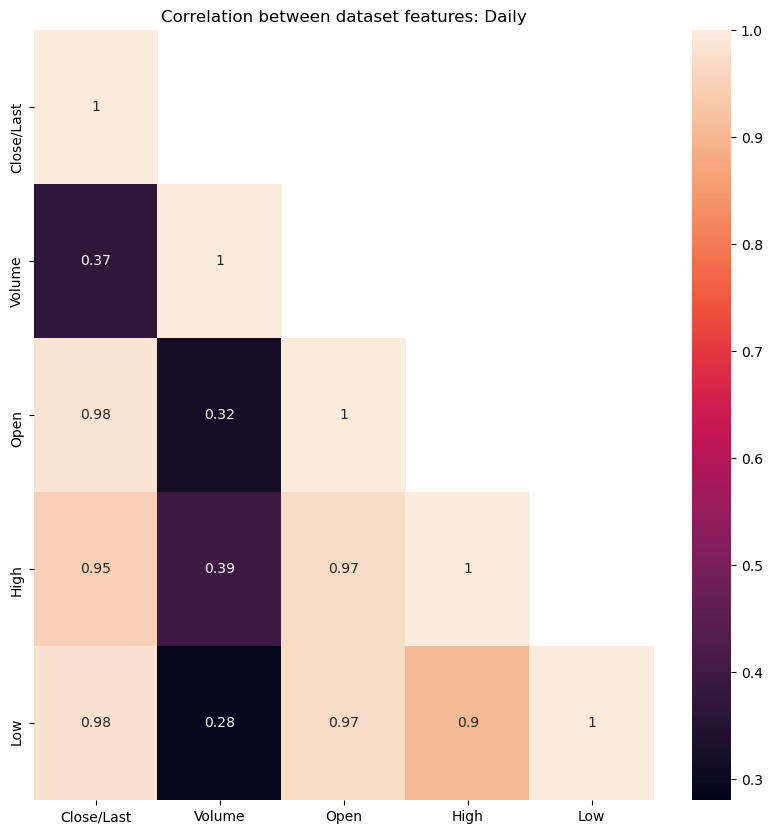

In [16]:
c = df.corr(method='pearson')
mask = np.triu(np.ones_like(c),k=1)
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.heatmap(c, mask=mask, annot=True, ax=ax)
ax.set_title('Correlation between dataset features: Daily')
plt.show()

    The strongest linear relationship to trading Volume is seen with the Daily High price for GME.

In [17]:
df_rolling_100 = df.set_index('Date').rolling(100).mean().shift(100)

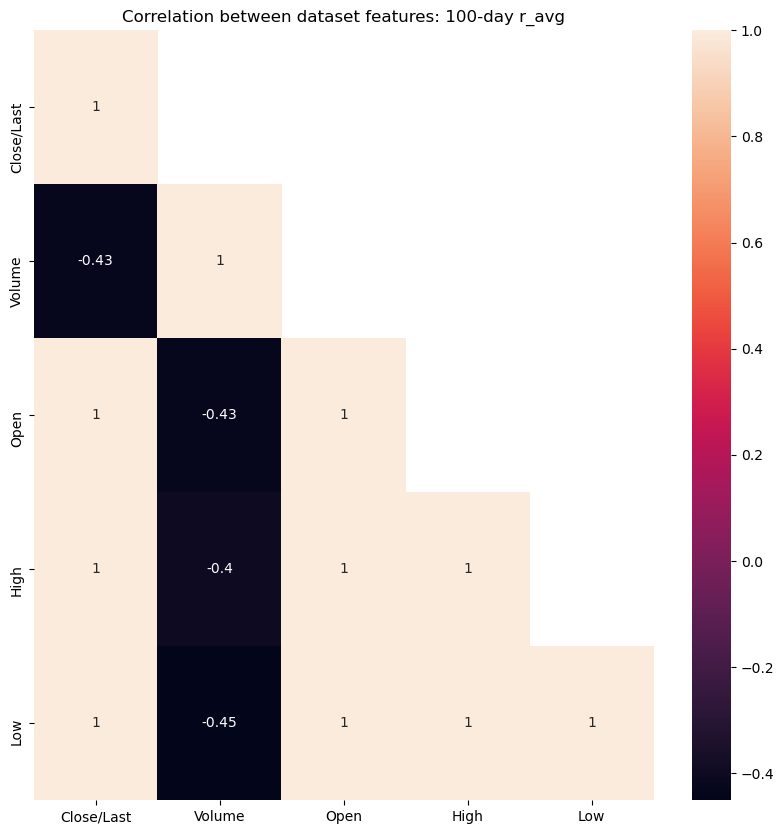

In [18]:
c = df_rolling_100.corr(method='pearson')
mask = np.triu(np.ones_like(c),k=1)
_, ax = plt.subplots(1,1,figsize=(10,10))

sns.heatmap(c, mask=mask, annot=True, ax=ax)
ax.set_title('Correlation between dataset features: 100-day r_avg')
plt.show()

    When performing the same correlation test on the data averaged using a 100-day rolling window, the direction and strength of the relationship is reversed, and the strongest correlation is observed between volume and low, but with a difference of .05 between all features.

In [19]:
df.to_csv('/home/thomas/Desktop/springboard/Capstone_two/capstone-two/data/03_primary/preprocessed_price.csv')

# Feature Engineering/Indicator Analysis:
    
    As the transformations done to our textual data are fairly straight forward, we shall instead turn our efforts of feature engineering to key stocker performance metrics: RSI Oscillator, Stochastic RSI, and VWAP.
    
    For our purposes we shall be looking at vwap 50, 100, 200 emas. As well as 

In [25]:
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2016-01-04,28.31,4330439,27.04,28.46,27.01
1,2016-01-05,28.77,3416646,28.59,29.01,28.06
2,2016-01-06,28.37,3756411,28.23,28.74,27.44
3,2016-01-07,28.45,2661821,28.12,28.77,27.74
4,2016-01-08,28.37,2699229,28.70,28.79,28.04


In [27]:
df['PV'] = df[['Close/Last','High','Low']].mean(axis=1) * df.Volume

In [28]:
for item in [50, 100, 200]:
    
    df[f'VWAP_{item}'] = df.PV.rolling(item).sum() / df.Volume.rolling(item).sum()
df.head()

,Date,Close/Last,Volume,Open,High,Low,PV,VWAP_50,VWAP_100,VWAP_200
0,2016-01-04,28.31,4330439,27.04,28.46,27.01,1.209347e+08,NaN,NaN,NaN
1,2016-01-05,28.77,3416646,28.59,29.01,28.06,9.776163e+07,NaN,NaN,NaN
2,2016-01-06,28.37,3756411,28.23,28.74,27.44,1.058682e+08,NaN,NaN,NaN
3,2016-01-07,28.45,2661821,28.12,28.77,27.74,7.538277e+07,NaN,NaN,NaN
4,2016-01-08,28.37,2699229,28.70,28.79,28.04,7.665810e+07,NaN,NaN,NaN


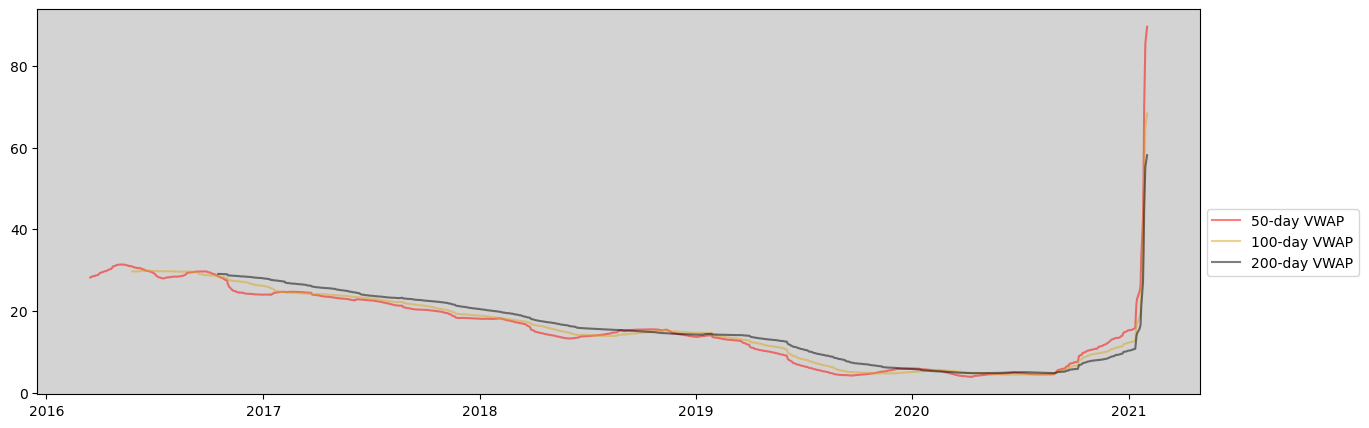

In [48]:
_, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_facecolor('lightgray')

ax.plot(df.Date, df.VWAP_50, color='red', label='50-day VWAP', alpha=0.5)
ax.plot(df.Date, df.VWAP_100, color='goldenrod', label='100-day VWAP', alpha=0.5)
ax.plot(df.Date, df.VWAP_200, color='black', label='200-day VWAP', alpha=0.5)

plt.legend(loc='upper left', bbox_to_anchor=[1.,0.5])
plt.show()




    Looking at the 50, 100, and 200-day value-weighted average prices reveals the beginning of a sharp increase in gme-prices in the last quarter of 2020 after a sustained downward trend from the previous 4.5 years.

In [29]:
def calc_rsi(series, period = 14): #period will be automatically set to 14
    change = series.diff()
    
    up = change.clip(lower = 0)
    dwn = -1*change.clip(upper=0)
    
    up_avg = up.ewm(com=period-1, min_periods=period).mean()
    dwn_avg = dwn.ewm(com=period-1, min_periods=period).mean()
    
    rs = up_avg / dwn_avg
    rsi = 100 - (100/(1+rs))
    
    return rsi

def stochastic(series, k_per, d_per, period):
    
    period_mins = series.rolling(period).min()
    period_maxs = series.rolling(period).max()
    
    stoch = ((series - period_mins) / (period_maxs - period_mins)) *100
    
    k = stoch.rolling(k_per).mean()
    d = k.rolling(d_per).mean()
    
    return stoch, k, d
    

In [30]:
df['RSI'] = calc_rsi(df['Close/Last'],14)

In [31]:
df['stoch_RSI'], df['slow_indicator'], df['fast_indicator'] = stochastic(df['RSI'], 3, 3, 14)

In [33]:
df.tail(50)

,Date,Close/Last,Volume,Open,High,Low,PV,VWAP_50,VWAP_100,VWAP_200,RSI,stoch_RSI,slow_indicator,fast_indicator
1229,2020-11-18,11.57,3169222,11.80,12.0400,11.5600,3.715385e+07,11.478525,9.787167,8.100149,50.348808,68.701726,80.426990,66.300962
1230,2020-11-19,12.46,11787610,11.60,12.7900,11.4500,1.442018e+08,11.622338,9.844575,8.143136,55.788824,100.000000,80.426990,76.017095
1231,2020-11-20,12.71,8402347,12.55,13.4600,12.5400,1.084183e+08,11.695187,9.888156,8.183581,57.207151,100.000000,89.567242,83.473741
1232,2020-11-23,13.90,9607973,12.90,14.1200,12.6700,1.303161e+08,11.806698,9.939874,8.233075,63.250616,100.000000,100.000000,89.998077
1233,2020-11-24,13.67,7186710,14.23,14.2600,13.3000,9.876935e+07,11.874838,9.984284,8.274892,61.444428,88.918550,96.306183,95.291142
1234,2020-11-25,14.75,8860092,13.60,15.2500,13.4200,1.282351e+08,12.030624,10.044730,8.332435,66.309470,100.000000,96.306183,97.537455
1235,2020-11-27,16.08,12504200,15.29,16.7400,14.8800,1.988168e+08,12.195479,10.138767,8.411840,71.139176,100.000000,96.306183,96.306183
1236,2020-11-30,16.56,31983500,18.17,19.4200,16.5575,5.601110e+08,12.555695,10.403243,8.635540,72.662346,100.000000,100.000000,97.537455
1237,2020-12-01,15.80,12666030,17.11,17.4000,15.7600,2.067096e+08,12.678906,10.491417,8.713040,66.663283,76.667266,92.222422,96.176202
1238,2020-12-02,16.58,7883380,15.70,16.6800,15.3800,1.278159e+08,12.853061,10.566033,8.765742,69.450930,87.509528,88.058932,93.427118


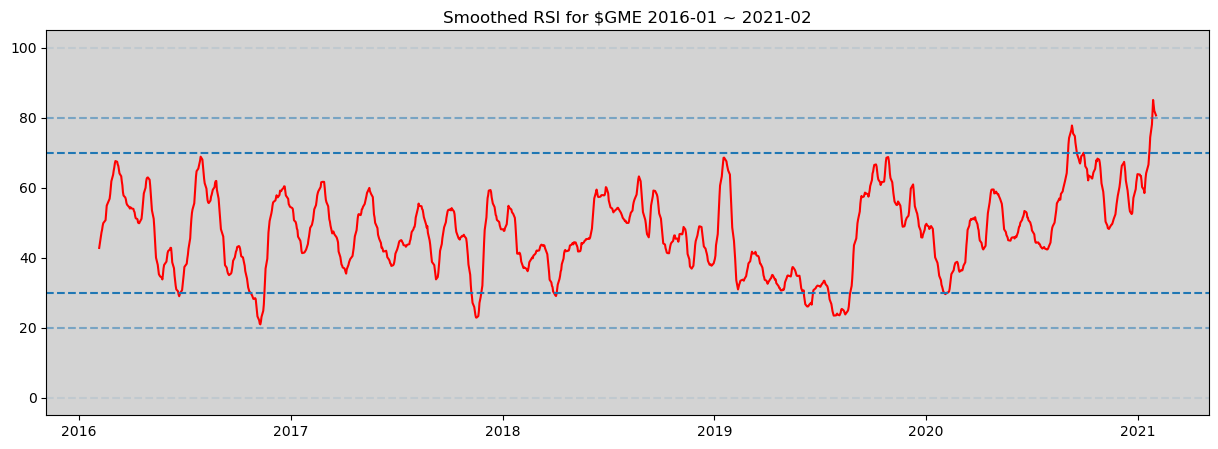

In [54]:
_, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Smoothed RSI for $GME 2016-01 ~ 2021-02')
ax.set_facecolor('lightgray')
ax.plot(df['Date'], df['RSI'].rolling(10).mean(), color='red')

ax.axhline(0, linestyle='--', alpha=0.1)
ax.axhline(20, linestyle='--', alpha=0.5)
ax.axhline(30, linestyle='--')

ax.axhline(70, linestyle='--')
ax.axhline(80, linestyle='--', alpha=0.5)
ax.axhline(100, linestyle='--', alpha=0.1)
plt.show()

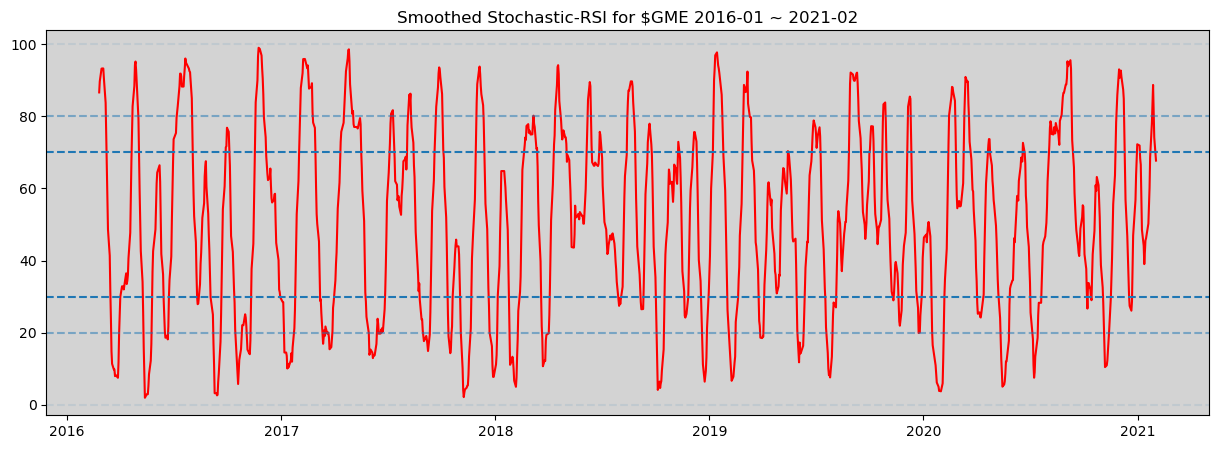

In [53]:
_, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Smoothed Stochastic-RSI for $GME 2016-01 ~ 2021-02')
ax.set_facecolor('lightgray')
ax.plot(df['Date'], df['stoch_RSI'].rolling(10).mean(), color='red')

ax.axhline(0, linestyle='--', alpha=0.1)
ax.axhline(20, linestyle='--', alpha=0.5)
ax.axhline(30, linestyle='--')

ax.axhline(70, linestyle='--')
ax.axhline(80, linestyle='--', alpha=0.5)
ax.axhline(100, linestyle='--', alpha=0.1)
plt.show()

    After applying a 10-day moving average to both the RSI and Stochastic-RSI, there can be observed a clear sustained upward trend in the RSI. Due to the increase volatility of the Stochastic-RSI no immediate trend can be observed.

In [49]:
df.to_csv('/home/thomas/Desktop/springboard/Capstone_two/capstone-two/data/03_primary/price_indicators.csv')